In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


Data Visualization:

<Axes: xlabel='Gene One', ylabel='Gene Two'>

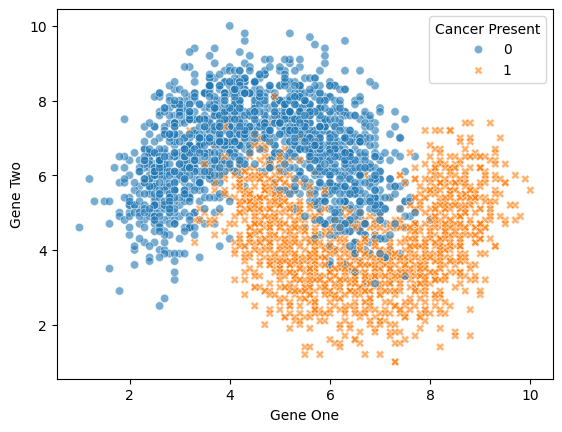

In [9]:
sns.scatterplot(data = df, x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present', alpha = 0.6, style = 'Cancer Present')

In [5]:
len(df)

3000

(4.0, 8.0)

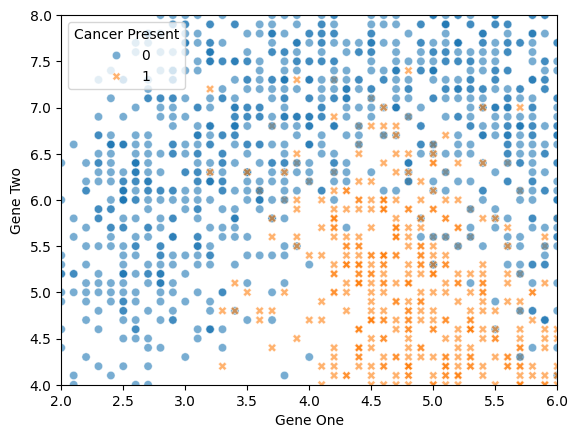

In [8]:
sns.scatterplot(data = df, x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present', alpha = 0.6, style = 'Cancer Present')
plt.xlim(2, 6)
plt.ylim(4, 8)

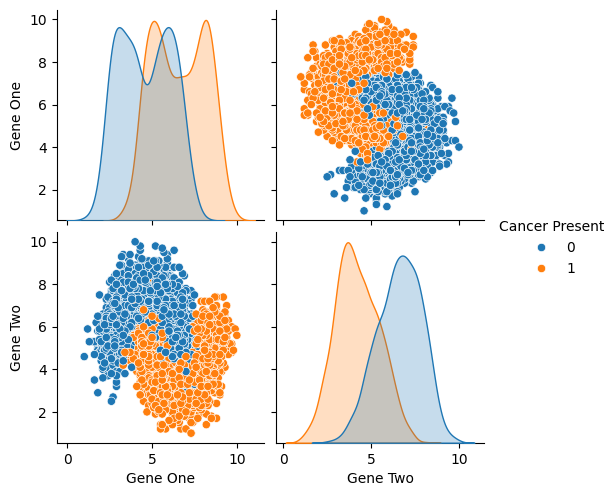

In [10]:
sns.pairplot(data = df, hue = 'Cancer Present')

Data Preparation:

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
X = df.drop('Cancer Present', axis = 1)

In [14]:
y = df['Cancer Present']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
scaler = StandardScaler() #Due to being based on distance metrics, scaling the data is even more important with KNN than Logistic Regression!

In [17]:
scaled_X_train = scaler.fit_transform(X_train)

In [18]:
scaled_X_test = scaler.transform(X_test)

Building Out A Simple KNN Model:

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [21]:
knn_model = KNeighborsClassifier(n_neighbors = 1) #The simplest possible KNN model has k = 1

In [22]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Model Evaluation:

In [28]:
y_pred = knn_model.predict(scaled_X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
#Most classification algorithms use the same set of evaluation metrics

In [29]:
confusion_matrix(y_test, y_pred)

array([[426,  44],
       [ 45, 385]])

In [30]:
len(y_test)

900

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [ ]:
df['Cancer Present'].value_counts() #This is a perfectly balanced dataset, so the model is actually performing 'pretty good'

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, y_pred)

0.9011111111111111

In [35]:
1 - accuracy_score(y_test, y_pred) #Error = 1 - Accuracy

0.09888888888888892

Choosing K With The Elbow Method:

In [ ]:
test_error_rates = [] #This algorithm keeps track of the error at various k values, and it's up to you to find the 'elbow' where the error levels off rather than troughs

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test, y_pred_test)

    test_error_rates.append(test_error)

In [37]:
test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

Text(0.5, 0, 'K Neighbors')

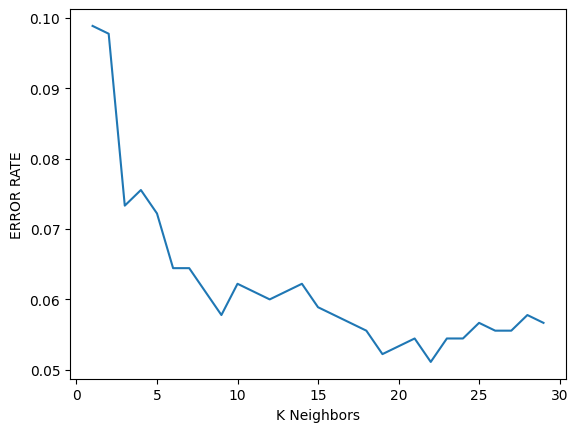

In [ ]:
plt.plot(range(1, 30), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')
#While k = 22 may seem tempting, it makes for a complex model, so considering where the error levels off is often better, in this case around k = 6

Setting Up A Pipeline:

In [39]:
scaler = StandardScaler()

In [40]:
knn = KNeighborsClassifier()

In [ ]:
knn.get_params().keys() #You'll have to know the string codes for all the parameters

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [43]:
operations = [('scaler', scaler), ('knn', knn)] #The order of operations (tuple pairs) matters!

In [42]:
from sklearn.pipeline import Pipeline

In [44]:
pipe = Pipeline(operations)

Choosing K With GridSearchCV:

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
k_values = list(range(1, 20))

In [47]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [48]:
param_grid = {'knn__n_neighbors': k_values}
#You have to be extra careful when naming the operations and the parameter grid

*Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:**

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[StackOverflow on this](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline)

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).

In [49]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')

In [50]:
full_cv_classifier.fit(X_train, y_train) #Thanks to the pipeline, you can now pass in the original X_train and y_train sets here
#This can take a while, depending on your computer

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
full_cv_classifier.best_estimator_.get_params() #Notice that these are the parameters for the entire pipeline too!

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Full Model Evaluation:

In [53]:
full_pred = full_cv_classifier.predict(X_test) #You also don't have to scale the X_test set when using pipelines!

In [54]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



Using The Full Model:

In [55]:
new_patient = [[3.8, 6.4]]

In [ ]:
full_cv_classifier.predict(new_patient)

c:\Users\Jake\Documents\Udemy Courses\Machine Learning Recap Course\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [57]:
full_cv_classifier.predict_proba(new_patient)

c:\Users\Jake\Documents\Udemy Courses\Machine Learning Recap Course\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])